In [69]:
%load_ext autoreload
%autoreload 2
import networkx as nx
import numpy as np
import pandas as pd
from genealogy_aligner import Pedigree
import seaborn as sns
import matplotlib.pyplot as plt
from genealogy_aligner.Aligner import DescMatchingAligner, PoincareAligner
from genealogy_aligner.Drawing import draw_interactive
import msprime as msp
import io
from IPython.display import SVG, display

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Text(0.5, 1.0, 'Coalescent tree (diploid)')

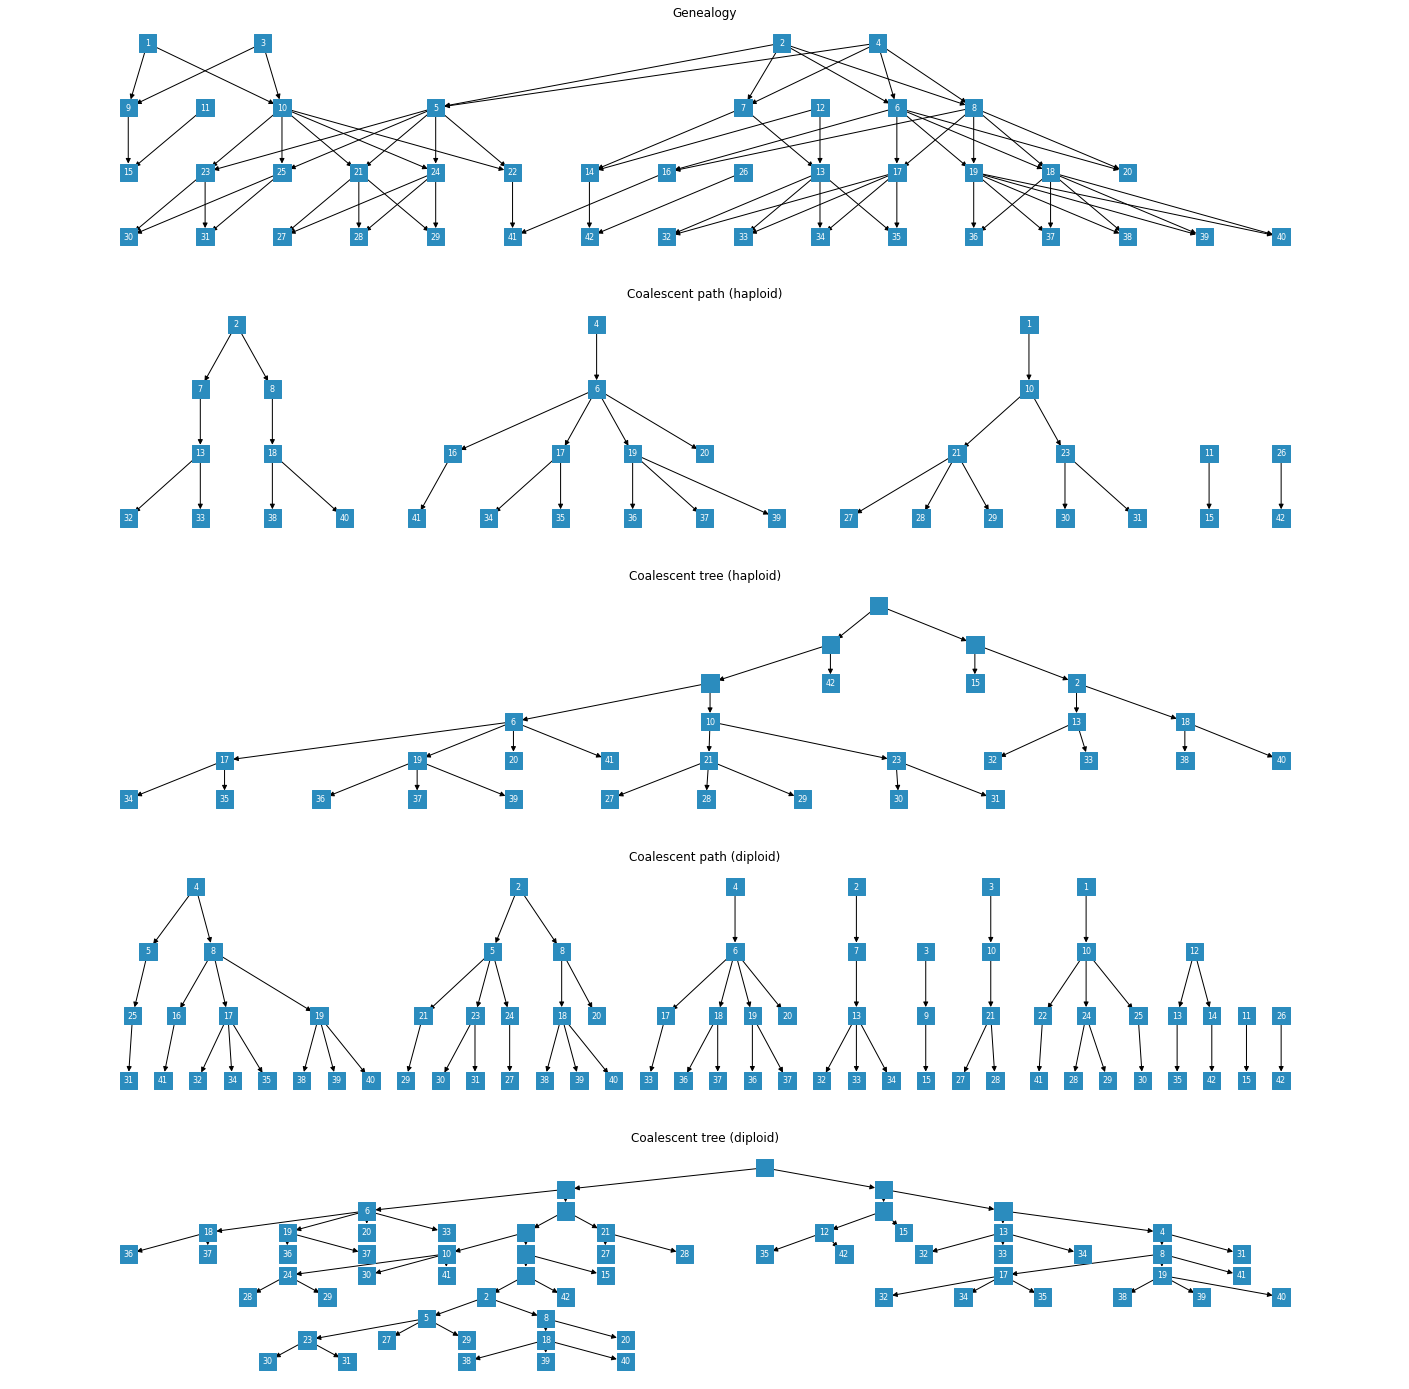

In [70]:
np.random.seed(724)

families = 3
generations = 3
avg_children = 2.2

ped = Pedigree.simulate_from_founders(families, generations, avg_children)

pt_1 = ped.sample_path()
ct_1 = pt_1.to_coalescent_tree()

pt_2 = ped.sample_path(ploidy=2)
ct_2 = pt_2.to_coalescent_tree()

fig, ax = plt.subplots(nrows=5, figsize=(25, 25))

ped.draw(ax=ax[0])
ax[0].set_title('Genealogy')

pt_1.draw(ax=ax[1], label_dict=pt_1.ts_node_to_ped_node)
ax[1].set_title('Coalescent path (haploid)')
ct_1.draw(ax=ax[2], label_dict=ct_1.ts_node_to_ped_node)
ax[2].set_title('Coalescent tree (haploid)')

pt_2.draw(ax=ax[3], label_dict=pt_2.ts_node_to_ped_node)
ax[3].set_title('Coalescent path (diploid)')
ct_2.draw(ax=ax[4], label_dict=ct_2.ts_node_to_ped_node)
ax[4].set_title('Coalescent tree (diploid)')

In [71]:
algn = DescMatchingAligner(ped, ct_1)
algn.align()
print(algn.evaluate()) # evaluate accuracy
# draw true vs. predicted
algn.draw()
plt.show()
algn.draw(use_predicted=True)

UnboundLocalError: local variable 'ts_n_succ' referenced before assignment

{'accuracy': 0.8709677419354839}


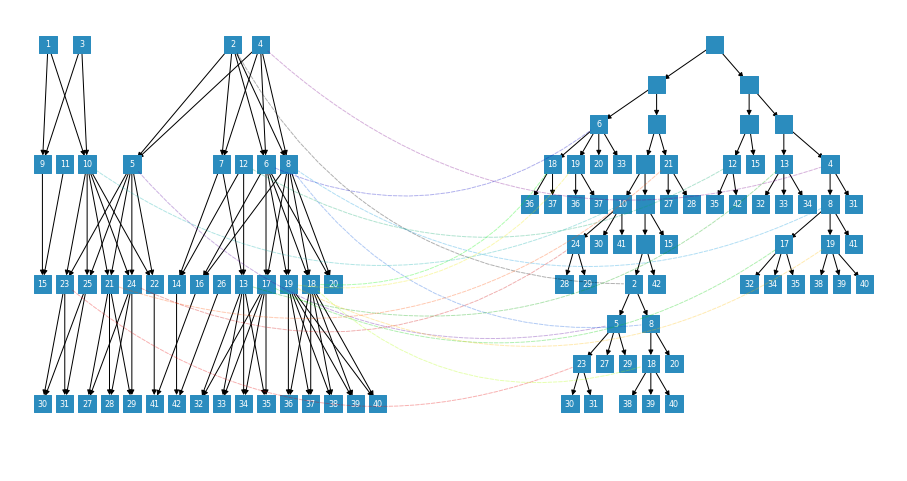

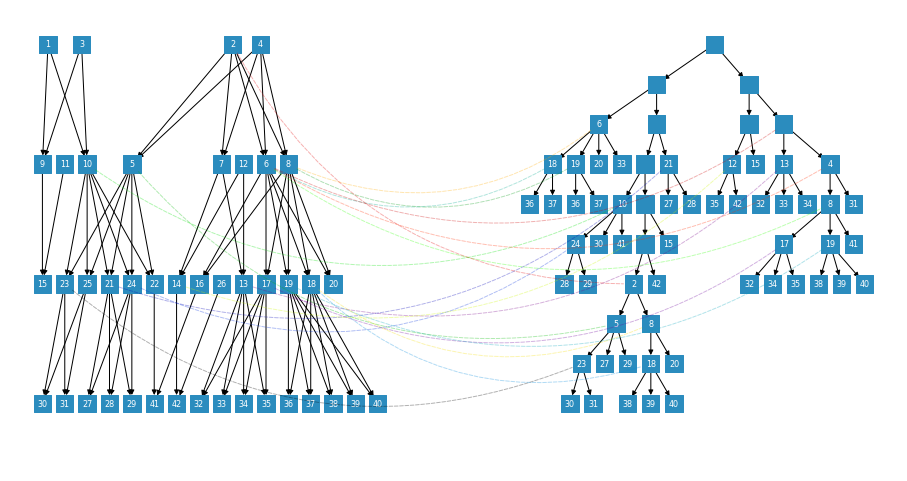

In [63]:
algn = DescMatchingAligner(ped, ct_2)
algn.align()
print(algn.evaluate()) # evaluate accuracy
# draw true vs. predicted
algn.draw()
plt.show()
algn.draw(use_predicted=True)

{'accuracy': 0.7096774193548387}


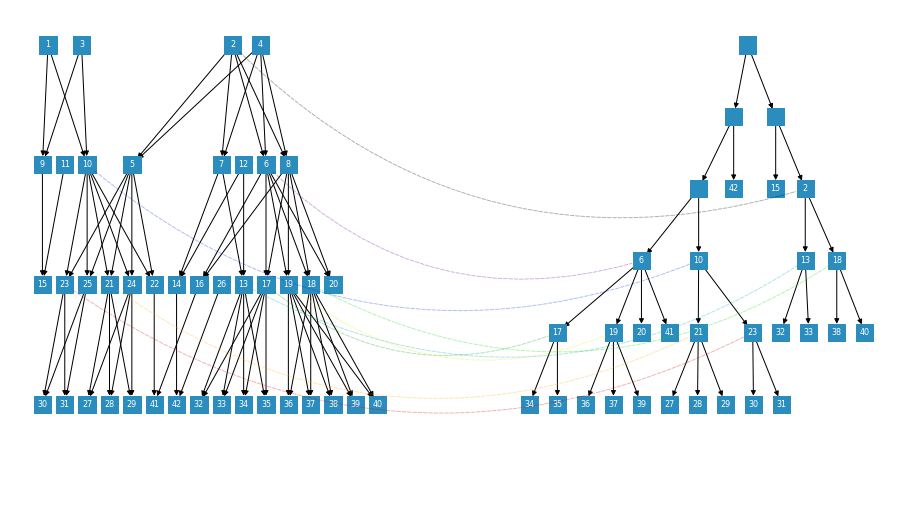

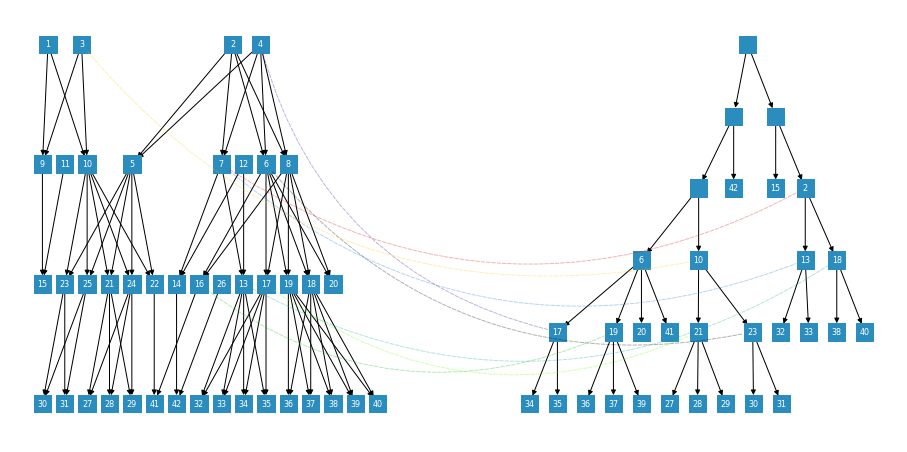

In [64]:
algn = PoincareAligner(ped, ct_1, k=2)
algn.align()
print(algn.evaluate()) # evaluate accuracy
# draw true vs. predicted
algn.draw()
plt.show()
algn.draw(use_predicted=True)

{'accuracy': 0.7258064516129032}


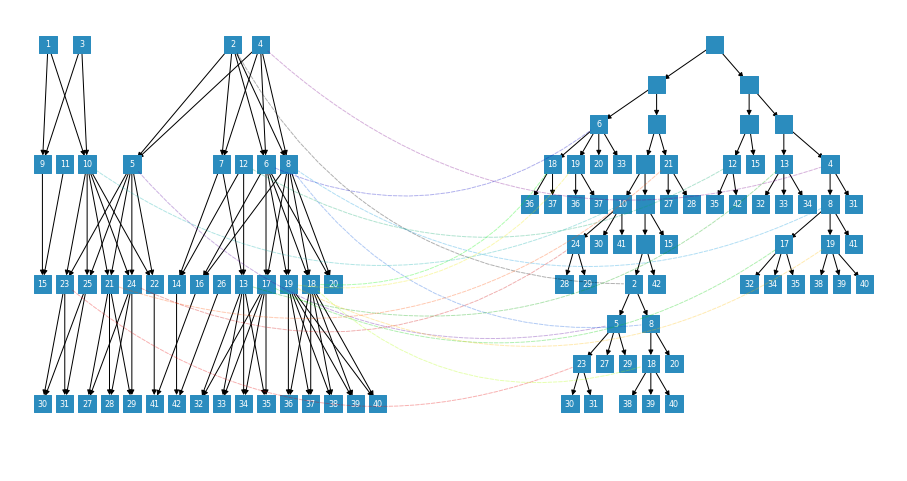

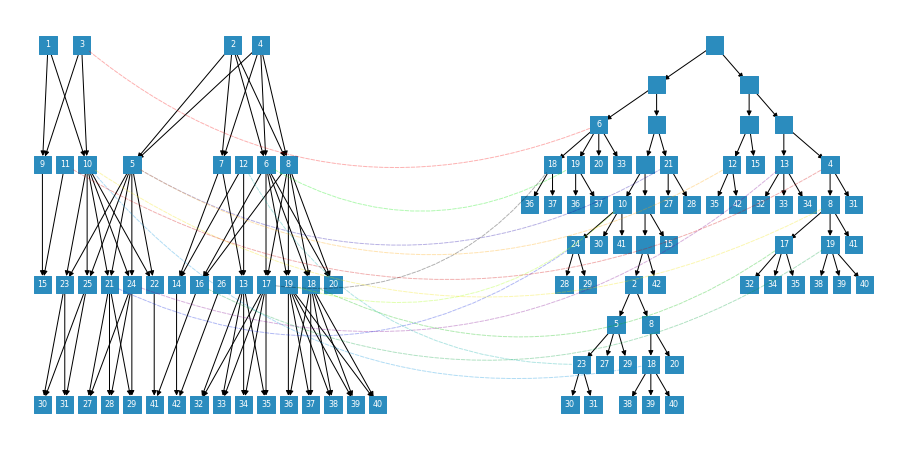

In [65]:
algn = PoincareAligner(ped, ct_2, k=10)
algn.align()
print(algn.evaluate()) # evaluate accuracy
# draw true vs. predicted
algn.draw()
plt.show()
algn.draw(use_predicted=True)

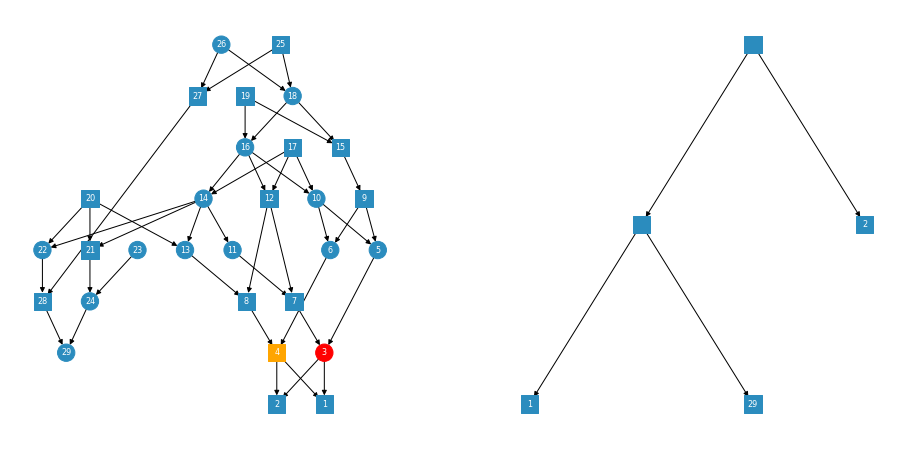

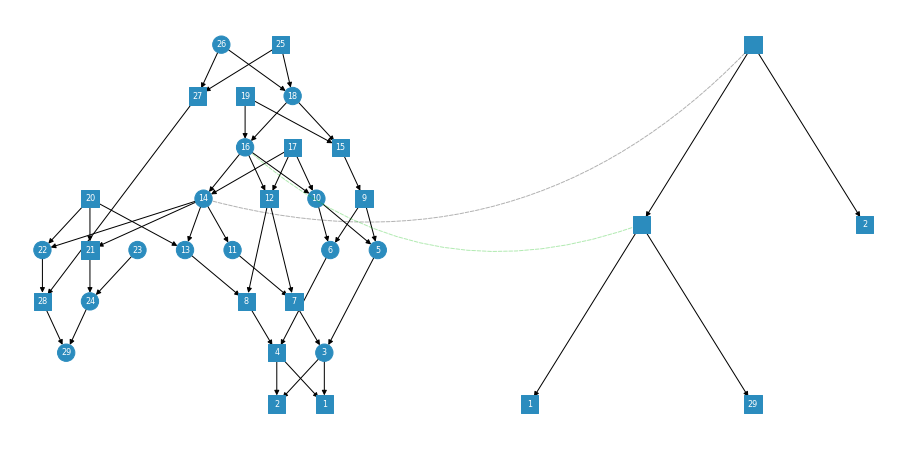

In [6]:
ped = Pedigree.from_table("../data/geneaJi.tsv", header=True, check_2_parents=False)
t = ped.sample_path()
ct = t.to_coalescent_tree()

algn = DescMatchingAligner(ped, ct)
algn.align()
algn.evaluate()

algn.draw(ped_kwargs={'node_color':{3: 'red', 4:'orange'}})
plt.show()
plt.close()
algn.draw(use_predicted=True)
plt.show()

In [3]:
draw_interactive(ped)

Text(value='', description='Node subset:', placeholder='List of nodes (comma separated)')

Text(value='1', description='Radius', placeholder='1')

Button(description='Plot', style=ButtonStyle())

Output()

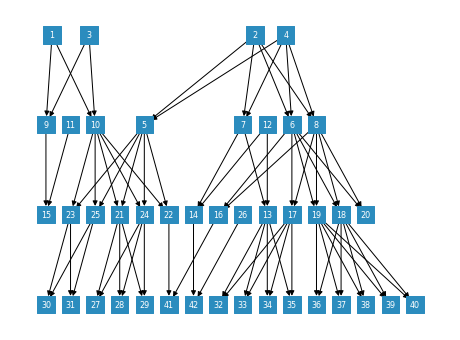

[15,
 20,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 17,
 13,
 19,
 18,
 22,
 16,
 26,
 14,
 9,
 11,
 8,
 6,
 24,
 21,
 25,
 23,
 4,
 2,
 1,
 3,
 12,
 7,
 5,
 10]

In [75]:
ped.draw()
plt.show()
6: Counter({41: 1,
          32: 1,
          33: 1,
          34: 1,
          35: 1,
          36: 2,
          37: 2,
          38: 2,
          39: 2,
          40: 2,
          20: 1})

In [99]:
sim_ped = Pedigree.simulate_from_founders(n_founders=2000, n_generations=20)

In [107]:
ped.get_num_paths_to_source(32)

{32: {32: 1},
 13: {32: 1},
 17: {32: 1},
 6: {32: 1},
 7: {32: 1},
 8: {32: 1},
 2: {32: 3},
 4: {32: 3},
 12: {32: 1}}

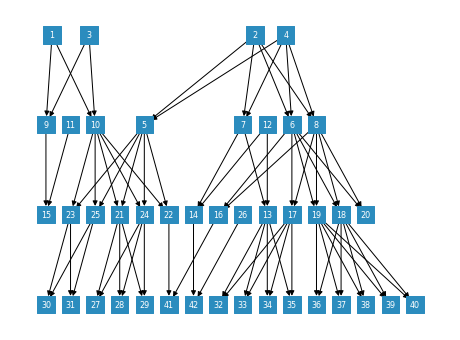

In [108]:
ped.draw()

In [112]:
%time sim_ped.get_num_paths_to_source()

CPU times: user 54.8 s, sys: 3.99 s, total: 58.8 s
Wall time: 1min


{40912: {40912: 1},
 40913: {40913: 1},
 40299: {40299: 1},
 40772: {40772: 1},
 40773: {40773: 1},
 40963: {40963: 1},
 40964: {40964: 1},
 41593: {41593: 1},
 41594: {41594: 1},
 41595: {41595: 1},
 41481: {41481: 1},
 41277: {41277: 1},
 41278: {41278: 1},
 41279: {41279: 1},
 42091: {42091: 1},
 40209: {40209: 1},
 40210: {40210: 1},
 40211: {40211: 1},
 40212: {40212: 1},
 40213: {40213: 1},
 41640: {41640: 1},
 41641: {41641: 1},
 41642: {41642: 1},
 41643: {41643: 1},
 41644: {41644: 1},
 41527: {41527: 1},
 42050: {42050: 1},
 42051: {42051: 1},
 42052: {42052: 1},
 42053: {42053: 1},
 40818: {40818: 1},
 40819: {40819: 1},
 41327: {41327: 1},
 41328: {41328: 1},
 40406: {40406: 1},
 40407: {40407: 1},
 40408: {40408: 1},
 40266: {40266: 1},
 40267: {40267: 1},
 40268: {40268: 1},
 40269: {40269: 1},
 40270: {40270: 1},
 42025: {42025: 1},
 42026: {42026: 1},
 40423: {40423: 1},
 40424: {40424: 1},
 40425: {40425: 1},
 41583: {41583: 1},
 41584: {41584: 1},
 41793: {41793: 1},


In [113]:
sim_ped.n_individuals

41748